Enter the upper limit of number of data: 19
Enter the number: 17


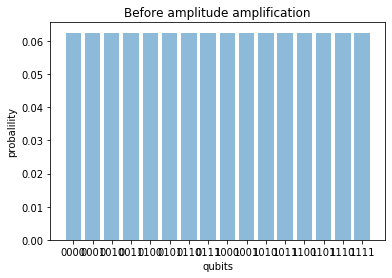

ValueError: shapes (19,19) and (16,1) not aligned: 19 (dim 1) != 16 (dim 0)

In [7]:

#importing required modules
import numpy as np

import matplotlib.pyplot as plt




#intialising to ket notation
def intialise_qubit_to_ket(alpha,beta):
    ket_qubit = np.array([[alpha], [beta]])#creating a coloum vector
    return ket_qubit


#intialising_to_bra_notation
def intialise_qubit_to_bra(alpha,beta):
    ket_qubit = intialise_qubit_to_ket(alpha,beta)
    bra_qubit = ket_qubit.conjugate().transpose()
    return bra_qubit

#checking validity of a qubit
def check_validity(qubit):# the arugment is a column vector
        bra_ket =  np.dot(qubit.transpose().conjugate(), qubit)
        if bra_ket[0] == 1 or round(float(bra_ket[0]), 2) == 1.00:
            return True
        else:
            return False


#constructing standard basis
def construct_standard_basis(n):#n is no. of qubit
    basis_vector_list = []
    for i in range(2**n):
        #using binary number notation
        basis = '0'*(n-len(bin(i)[2:]))+bin(i)[2:]
        basis_vector_list.append(basis)
    return basis_vector_list


#creating a function to convert array into list
def convt(array):#argument is column matrix
    if np.size(array,axis=0) == 1:
        nest_lst = array.tolist()
    elif np.size(array,axis=1) == 1:
        array_1 = array.transpose()
        nest_lst = array_1.tolist()
    return nest_lst[0]


#measure a single qubit
def measure_single(qubit1,generalstate):#the arguments are array with pre-mutliplier as the elements
        measure_qubit_list = convt(np.dot(qubit1.transpose(),generalstate))
        measure_qubit = measure_qubit_list[0]
        return measure_qubit


#density matrix
def construct_density_matrix(qubit):
    ket_qubit = qubit
    bra_qubit = qubit.transpose()
    # matrix multiplication
    density_matrix = np.dot(ket_qubit, bra_qubit)
    return density_matrix


#check validity of given gate
def check_validity_gate(gate):#the argument is a array
    hermitian_gate = gate.transpose().conjugate()
    # throught determinant method
    if np.linalg.det(np.dot(hermitian_gate, gate)) == 1.0:
        return True
    else:
        return False


#checking validity of a qubit
def check_validity(qubit):# the arugment is a column vector
        bra_ket =  np.dot(qubit.transpose().conjugate(), qubit)
        if bra_ket[0] == 1 or round(float(bra_ket[0]), 2) == 1.00:
            return True
        else:
            return False


#creating pauli X Gates
def pauli_X(qubit):# the argument is column vector
    if check_validity(qubit):
        return np.dot(np.array([[0, 1],[1, 0]]),qubit)
    else:
        print('invalid input')


#creating pauliY gate
def pauli_Y(qubit):
    if check_validity(qubit):
        return np.dot(np.array([[0, -1j], [-1j, 0]]), qubit)
    else:
        print('invalid input')


#creating pauli_Z
def pauli_Z(qubit):
    if check_validity(qubit):
        return np.dot(np.array([[1, 0], [0, -1]]), qubit)
    else:
        print('invalid input')



# creating hadamard gate
def hadamard_gate(qubit):
    H = (1/np.sqrt(2))*np.array([[1, 1], [1, -1]])
    if check_validity(qubit):
        return np.dot(H, qubit)
    else:
        print('invalid input')


#creating controlled not gate
def cnot(control, target):
    Cnot = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
    combined = np.kron(control, target)
    return np.dot(Cnot, combined)


#creating double controlled not gate
def ccnot(control_1,control_2,traget):
    Ccnot = np.array([[1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0]])
    control = np.kron(control_1, control_2)
    combined = np.kron(control, traget)
    return np.dot(Ccnot, combined)


#creating controlled Pauli_Z gate
def cz(control, target):
    Cz = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0,  0, -1]])
    combined = np.kron(control, target)
    return np.dot(Cz, combined)


#creating swap gate
def swap(qubit_1,qubit_2):
    Swap = np.array([[1, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1]])
    combined = np.kron(qubit_1, qubit_2)
    return np.dot(Swap, combined)



#creating controlled swap gate, Fredkin gate
def cswap(control,traget_1,traget_2):
    Cswap = np.array([[1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1]])
    combined_1 = np.kron(control, traget_1)
    combined = np.kron(combined_1, traget_2)
    return np.dot(Cswap, combined)



#creating a function for combing gates
def combine_gate(*gates):#the arguments are array of gates in order
    combined = gates[0]
    for i in range(len(gates)-1):
        combined_1 = np.kron(combined, gates[i + 1])
        combined = combined_1
    return combined


#creating a function for combing qubits
def combine_qubits(*qubits):#the arguments are array of qubits in otder
    combined = qubits[0]
    for i in range(len(qubits)-1):
        combined_1 = np.kron(combined, qubits[i + 1])
        combined = combined_1
    return combined
#creating  combined_H
def combine_H(n):
    #where n is no. Hardamard gates
    combined_h = combine_gate((1/np.sqrt(2))*np.array([[1, 1], [1, -1]]), (1/np.sqrt(2))*np.array([[1, 1], [1, -1]]))
    for i in range(0, n-2):
        combined_h = combine_gate(combined_h, (1/np.sqrt(2))*np.array([[1, 1], [1, -1]]))
    return combined_h


#creating  combined_X
def combine_X(n):
    #where n is no. pauli's X gates
    combined_x = combine_gate(np.array([[0, 1], [1, 0]]), np.array([[0, 1],[1, 0]]))
    for i in range(0, n-2):
        combined_x = combine_gate(combined_x, np.array([[0, 1],[1, 0]]))
    return combined_x


#creating a superpostion state
def superposition(n):
    #n is no. of state 0
    combined_q = combine_qubits(np.array([[1], [0]]), np.array([[1], [0]]))
    for i in range(0, n-2):
        combined_q = combine_qubits(combined_q, np.array([[1], [0]]))
    combined_g = combine_gate((1/np.sqrt(2))*np.array([[1, 1], [1, -1]]), (1/np.sqrt(2))*np.array([[1, 1], [1, -1]]))
    for i in range(0, n-2):
        combined_g = combine_gate(combined_g, (1/np.sqrt(2))*np.array([[1, 1], [1, -1]]))
    return np.dot(combined_g, combined_q)


#defining oracle function
def oracle(w, s):
    #where w is the winner state, where s is the no. of supersition states
    orcl_1 = np.identity(s, dtype=int)
    orcl_1[w][w] = -orcl_1[w][w]
    return orcl_1

#creating reflection over reduced mean
def mean_reflector(n):
    #where s is the superposition
    combined_q = combine_qubits(np.array([[1], [0]]), np.array([[1], [0]]))
    for i in range(0, n - 2):
        combined_q = combine_qubits(combined_q, np.array([[1], [0]]))
    return construct_density_matrix(combined_q)*2 - np.identity(2**n, dtype=int)

#let's N(no. of data is 8, then no. of (n) qubit used 3
N = input("Enter the max number")
n = int(np.log2(N))
#let's say the winner item is 1
w = 13
#finding the superposition given the no. qubits
S_position = superposition(n)
qubits = tuple(construct_standard_basis(n))
Y_pos = np.arange(len(qubits))
probalility = (S_position*S_position).flatten()

plt.bar(Y_pos,  probalility, align='center', alpha=0.5)
plt.xticks(Y_pos, qubits)
plt.ylabel('probalility')
plt.xlabel('qubits')
plt.title('Before amplitude amplification')
plt.show()


# iterating over the qubits sqrt(N) no. of times perfroming amplitude amplification
for i in range(int((3.14/4)*np.sqrt(N))):
    interm_1 = np.dot(oracle(w, N), S_position)
    interm_2 = np.dot(combine_H(n), interm_1)
    interm_3 = np.dot(mean_reflector(n), interm_2)
    interm_4 = np.dot(combine_H(n), interm_3)
    S_position = interm_4
    print()
    print('amplified superposition in iteration'+str(i+1)+'\n')
    print(interm_4)
    qubits = tuple(construct_standard_basis(n))
    Y_pos = np.arange(len(qubits))
    amplitude = (S_position*S_position).flatten()

    plt.bar(Y_pos,  amplitude, align='center', alpha=1.0)
    plt.xticks(Y_pos, qubits)
    plt.ylabel('probalility')
    plt.xlabel('qubits')
    plt.title('After two reflection in'+str(i+1)+'th iteration')
    plt.show()